In [62]:
import sys
import os

import pandas as pd; import numpy as np; import matplotlib.pyplot as plt
import panel as pn
from panel.interact import interact, interactive, fixed, interact_manual
from panel import widgets
pn.extension()
from pylab import * 
#import plotly
#import plotly.tools as tls
#import plotly.figure_factory as ff
#import chart_studio.plotly as py
import panel as pn
import bokeh
import string
#import inspect
#src = inspect.getsource(bokeh)
#print(src)
#from ixmp import Platform
#from message_ix import Scenario
#from message_ix.reporting import Reporter
import pyam
#import plotly.graph_objects as go
#import message_ix

YEAR_LIST = [2020,2030,2050]



copper = pd.read_csv('CRESTv4 Data_outputs_analyze_CRESTv4_data.csv')


copper.head()


Unnamed: 0   Model Scenario            Region          Variable Unit  \
0           0  COPPER    CTax0  British Columbia   capacity|gas cc   MW   
1           1  COPPER    CTax0  British Columbia   capacity|gas sc   MW   
2           2  COPPER    CTax0  British Columbia     capacity|coal   MW   
3           3  COPPER    CTax0  British Columbia  capacity|nuclear   MW   
4           4  COPPER    CTax0  British Columbia    capacity|hydro   MW   

       2020         2030         2050  
0    480.20  1411.176759  3692.836606  
1     46.00     0.000000     0.000000  
2      0.00     0.000000     0.000000  
3      0.00     0.000000     0.000000  
4  16577.33     0.000000     0.000000

In [63]:
copper_df = pyam.IamDataFrame(copper)

In [64]:
copper.head()

Unnamed: 0   Model Scenario            Region          Variable Unit  \
0           0  COPPER    CTax0  British Columbia   capacity|gas cc   MW   
1           1  COPPER    CTax0  British Columbia   capacity|gas sc   MW   
2           2  COPPER    CTax0  British Columbia     capacity|coal   MW   
3           3  COPPER    CTax0  British Columbia  capacity|nuclear   MW   
4           4  COPPER    CTax0  British Columbia    capacity|hydro   MW   

       2020         2030         2050  
0    480.20  1411.176759  3692.836606  
1     46.00     0.000000     0.000000  
2      0.00     0.000000     0.000000  
3      0.00     0.000000     0.000000  
4  16577.33     0.000000     0.000000

<ipython-input-85-88907491083e>:1: DeprecationWarning: This method is deprecated and will be removed in future versions. Please use `IamDataFrame.plot.stack()`.
  alberta_200_df = copper_df.filter(scenario = 'CTax200',


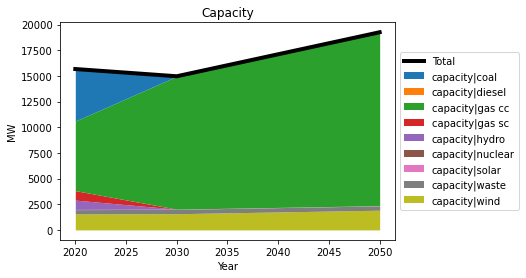

In [85]:
alberta_200_df = copper_df.filter(scenario = 'CTax200',
              region = 'Alberta' ,variable = 'capacity|*').stack_plot(total=True,
                                         title = 'Capacity')


<ipython-input-86-f8084524ee68>:1: DeprecationWarning: This method is deprecated and will be removed in future versions. Please use `IamDataFrame.plot.stack()`.
  copper_df.filter(scenario = 'CTax200',


<AxesSubplot:title={'center':'Capacity'}, xlabel='Year', ylabel='MW'>

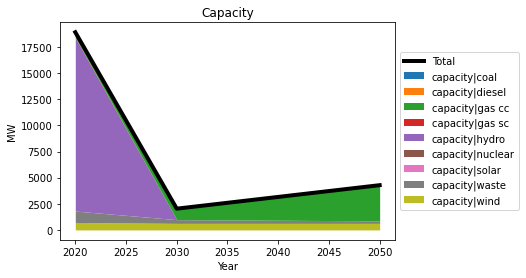

In [86]:
copper_df.filter(scenario = 'CTax200',
              region = 'British Columbia' ,variable = 'capacity|*').stack_plot(total=True,
                                         title = 'Capacity')


In [180]:
capacity_title_list = ["capacity|gas cc" , "capacity|gas sc", "capacity|coal", "capacity|nuclear", "capacity|hydro", "capacity|wind","capacity|solar","capacity|waste","capacity|diesel"]
emissions_title_list = ["Emissions|Carbon"]


plot_dictionary = dict()
plot_dictionary["capacity*"] = dict(titles=capacity_title_list)
plot_dictionary["Emissions*"]= dict(titles=emissions_title_list)

In [181]:
from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def str_value(long_string):
        long_string.replace("]","0")
        #print(long_string)
        
        split_string = long_string.split(" ")
      
        value = split_string[-1]
        value = value.rstrip(value[-1])
       
        #value = value[:-1]
        print(split_string)
        print(split_string[-1])
        return value

In [182]:
#PLOT DICTIONARIES 
years=[2020,2025,2030,2035,2040,2045,2050,2055,2060]
carbon_tax = [0,50,100,150,200]

#plot_dictionary["Useful"] = dict(df=df_useful, titles=useful_titles, years=[2025,2030,2035,2040,2045,2050,2055,2060])
#plot_dictionary["Scenarios"] = dict(ct = carbon_tax)
#plot_dictionary

In [194]:
#ATTEMPT WE MIGHT DISCARD
def ex_fig_general(plot_name, region, scenario):
       
    #     plot_dictionary = dict()
    #     plot_dictionary[plot_name] = dict(df = v_df, titles=["Capacity",["Emissions"]], years=[2020,2030,2050])
    
    
#     print("Year List")
#     print(year_list)

    # year list is already formatted as a list
    #print(scenario)
    all_y_data = [] # (list of lists)
    #print("type in ex fig")
   # print(type(primary_df))
   # print(type(dataframe))
    new_y_title_list = []
    # get the y_title_list for the current plot 
#     print(plot_name)
#     print(plot_dictionary[plot_name]["titles"])
    print("the plot name")
    print(plot_name)
    
    y_tile_list = plot_dictionary[plot_name]["titles"]
    print("Here is ytitlelist")
    #print(y_title_list)
    for y_title in y_tile_list:
        y_data = produce_list(y_title, plot_name, plot_dictionary, scenario, region)
        #print("AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA")
       # print("Creating y dataset with {} datapoints".format(len(y_data)))
        # TODO: INCLUDE ALL DATASETS
        #assert(len(y_data)>0)
        if len(y_data) > 0:
            all_y_data.append(y_data)
            new_y_title_list.append(y_title)
        else:
            print("FOUND EMPTY DATASET: EXCLUDING")
    
    print("HERE IS THE Y DATA")
    print(all_y_data)
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    #fig, ax = plt.subplots()
    #ax.stackplot(x, y1, y2, y3, y4, y5, y6, y7, labels=labels)
    print("SSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSSS")

    #print("length of year list", len(year_list))
    #print(len(*all_y_data))
   # print("Lenght of labels", len(new_y_title_list))
   # sys.stdout.flush()
   # print("after labels")
    ax.stackplot(YEAR_LIST, *all_y_data, labels=new_y_title_list)
    
    ax.legend(loc='upper left')
    return fig

In [195]:
def produce_list(title, Variable, plot_dictionary, scenario, region):
   
    #foo = df_useful.filter(scenario = 'baseline', variable = "Useful Energy|non-Commercial biomass", year = plotyrs)
    #print("type in produce list")
    #print(type(primary_df))
   # print(type(dataframe))
    
    #current issue: this function returns an empty dataframe (no rows)
    # option1: is the data there?
    # option2: (is our problem) we're not asking for the data correctly (check args on filter command)
    # variable represents the plot, it has an entry in the plot dictionary (its a key)
    
#     plot_dictionary = dict()
#     plot_dictionary[Variable] = dict(df = v_df, titles=["Capacity",["Emissions"]], years=[2020,2030,2050])
    plotyrs = YEAR_LIST
#     plotdf = plot_dictionary[Variable]["df"]
    plotdf = create_df(Variable, scenario, region)
    print("Plot Df")
    print(plotdf.head())
    
    foo = plotdf.filter(scenario = scenario, variable = title, year = plotyrs)
#     foo = Variable.filter(scenario = 'baseline', variable = title, year = plotyrs)
   # print("getting data with filter: {}, {}, {}".format('baseline', title, str(plotyrs)))
   # foo_string = foo.astype('string')
   # print(type(foo))
   # foo = foo.applymap(str)
   #print(foo)
    container = []
    print("Data Values")
    print(foo.data.values)
    for i in foo.data.values:
       #print(i)
       #print(str(i))
        bar = str(i)
      #  print(title)
        test_value = str_value(bar)
       # print("Test Value =")
      #  print(test_value)
        num = float(test_value)
        print("Here is num")
        print(num)
        container.append(num)
    print("Here is the container")
    print(container)
    return container



In [196]:
def create_df(Variable, scenario, region):
    v_df = copper_df.filter(scenario = scenario,
               variable = Variable,region = region)
    print("Emission Df")
    print(v_df)
    return v_df

# def create_dict(Variable, v_df):
#     plot_dictionary = dict()
#     plot_dictionary["capacity*"] = dict(df = v_df, titles=["Capacity","Emissions"], years=[2020,2030,2050])
#     plot_dictionary["emissions*"]= dict(df = v_df, titles=["Capacity","Emissions"], years=[2020,2030,2050])
#     return plot_dictionary

In [197]:
def change_plot(Variable, region, scenario, view_fn=ex_fig_general,  y="Hi There!"):
    #y_title_list = 
    #Variable =
    
    #copper_df.filter(scenario = 'CTax200',
            #  region = 'British Columbia' ,variable = 'capacity|*')

    
    
    
    return view_fn(Variable, region, scenario)

In [198]:
y = "<br>\n# Copper Plot\nChoose between the following options"
# interact_dict = dict(Variable=["capacity|*","emissions|*"],
#                      region=[["Canada"], ["Alberta"],["British Columbia"],["Manitoba"],["New Brunswick"],
#                      ["Newfoundland and Labrador"],[" Nova Scotia"],["Ontario"],["Prince Edward Island"],["Quebec"],["Saskatchewan"]],
#                      scenario = ["CTax0", "CTax50", "CTax100", "CTax150", "CTax200"], y="Hi There!")
interact_dict = dict(Variable=["capacity*","Emissions*"], region = ["Canada","Alberta" , "Manitoba", "New Brunswick", "Newfoundland and Labrador",
                                                                    "Nova Scotia", "Ontario", "Prince Edward Island", "Quebec","Saskatchewan"], scenario =["CTax0", "CTax50", "CTax100", "CTax150", "CTax200"],  y="Hi There!")


i = pn.interact(change_plot, **interact_dict)
[""]
#i = pn.interact(ex_fig_general, **kw)
i.pprint()
p = pn.Row(i[1][0], pn.Column(y, i[0][0],i[0][2],i[0][1]))
p.show()

# v_df = copper_df.filter(scenario = "CTax0",
#                variable = Variable,region = region)
#i.show()
#pandas_pdf = pdf.as_pandas()
#print("FDASUFSDHNJFSDF")
#print(pandas_pdf)
#print(type(pandas_pdf))
p#andas_df_useful = df_useful.as_pandas()
#kw = dict(Variable=['Primary Energy', 'Secondary Energy', 'Final Energy', 'Emissions'], Scenario = ['Baseline', 'Second Scenario', 'Third Scenario' ], y="Hi there!")
#kw = dict(Variable=['Primary Energy', 'Secondary Energy', 'Final Energy', 'Emissions'], y="Hi there!")

#print(abc)
# kw = dict(Variable=['Primary Energy', 'Secondary Energy', 'Final Energy', 'Emissions'], 
#           Scenario = ['Baseline', 'Second Scenario', 'Third Scenario' ], 
#           y="Hi there!")

# plot_dictionary = dict()
# plot_dictionary["Useful"] = dict(df=df_useful)
# plot_dictionary["Primary"] = dict(df=primary_df)
#print("FSDFSDFDGGGGGG")
#print(plot_dictionary)



the plot name
capacity*
Here is ytitlelist
Emission Df
<class 'pyam.core.IamDataFrame'>
Index dimensions:
 * model      : COPPER (1)
 * scenario   : CTax0 (1)
Timeseries data coordinates:
   region     : Canada (1)
   variable   : capacity|coal, capacity|diesel, capacity|gas cc, ... capacity|wind (9)
   unit       : MW (1)
   year       : 2020, 2030, 2050 (3)
   unnamed: 0 : 452, 458, 450, 451, 454, 453, 456, 457, 455 (9)
Meta indicators:
   exclude (bool) False (1)
Plot Df
    model scenario  region         variable unit  year  unnamed: 0  \
0  COPPER    CTax0  Canada    capacity|coal   MW  2020         452   
1  COPPER    CTax0  Canada    capacity|coal   MW  2030         452   
2  COPPER    CTax0  Canada    capacity|coal   MW  2050         452   
3  COPPER    CTax0  Canada  capacity|diesel   MW  2020         458   
4  COPPER    CTax0  Canada  capacity|diesel   MW  2030         458   

          value  
0   8688.000000  
1   5962.882077  
2   2984.000000  
3  83964.323000  
4   1132.9

TypeError: 'Text' object is not callable

the plot name
capacity*
Here is ytitlelist
Emission Df
<class 'pyam.core.IamDataFrame'>
Index dimensions:
 * model      : COPPER (1)
 * scenario   : CTax0 (1)
Timeseries data coordinates:
   region     : New Brunswick (1)
   variable   : capacity|coal, capacity|diesel, capacity|gas cc, ... capacity|wind (9)
   unit       : MW (1)
   year       : 2020, 2030, 2050 (3)
   unnamed: 0 : 227, 233, 225, 226, 229, 228, 231, 232, 230 (9)
Meta indicators:
   exclude (bool) False (1)
Plot Df
    model scenario         region         variable unit  year  unnamed: 0  \
0  COPPER    CTax0  New Brunswick    capacity|coal   MW  2020         227   
1  COPPER    CTax0  New Brunswick    capacity|coal   MW  2030         227   
2  COPPER    CTax0  New Brunswick    capacity|coal   MW  2050         227   
3  COPPER    CTax0  New Brunswick  capacity|diesel   MW  2020         233   
4  COPPER    CTax0  New Brunswick  capacity|diesel   MW  2030         233   

         value  
0   466.000000  
1   466.000000  
